# Hyperparameter Tuning and Pruning in Decision Trees - Lab

## Introduction

In this lab, you will use the titanic dataset to see the impact of tree pruning and hyperparameter tuning on the predictive performance of a decision tree classifier. Pruning reduces the size of decision trees by removing nodes of the tree that do not provide much predictive power to classify instances. Decision trees are the most susceptible out of all the machine learning algorithms to overfitting and effective pruning can reduce this likelihood. 

## Objectives

In this lab you will: 

- Determine the optimal hyperparameters for a decision tree model and evaluate the model performance

## Import necessary libraries

Let's first import the libraries you'll need for this lab. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn-v0_8-darkgrid')

## Import the data

The titanic dataset, available in `'titanic.csv'`, is all cleaned up and preprocessed for you so that you can focus on pruning and optimization. Import the dataset and print the first five rows of the data: 

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,1,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,2,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0,1
2,3,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1,1
3,4,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1,1
4,5,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1,0
887,888,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1,1
888,889,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1,0
889,890,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0,1


## Create training and test sets

- Assign the `'Survived'` column to `y` 
- Drop the `'Survived'` and `'PassengerId'` columns from `df`, and assign the resulting DataFrame to `X` 
- Split `X` and `y` into training and test sets. Assign 30% to the test set and set the `random_state` to `SEED` 

In [3]:
# Create X and y
y = df['Survived']
X = df.drop(['Survived', 'PassengerId'], axis=1)

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)


## Train a vanilla classifier

__Note:__ The term "vanilla" is used for a machine learning algorithm with its default settings (no tweaking/tuning).

- Instantiate a decision tree 
  - Use the `'entropy'` criterion and set the `random_state` to `SEED` 
- Fit this classifier to the training data 

In [4]:
# Train the classifier using training data
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=1)

## Make predictions 
- Create a set of predictions using the test set 
- Using `y_test` and `y_pred`, calculate the AUC (Area under the curve) to check the predictive performance

In [5]:
# Make predictions using test set
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.7367718101733446

## Maximum Tree Depth

Let's first check for the best depth parameter for our decision tree: 

- Create an array for `max_depth` values ranging from 1 - 32  
- In a loop, train the classifier for each depth value (32 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results 

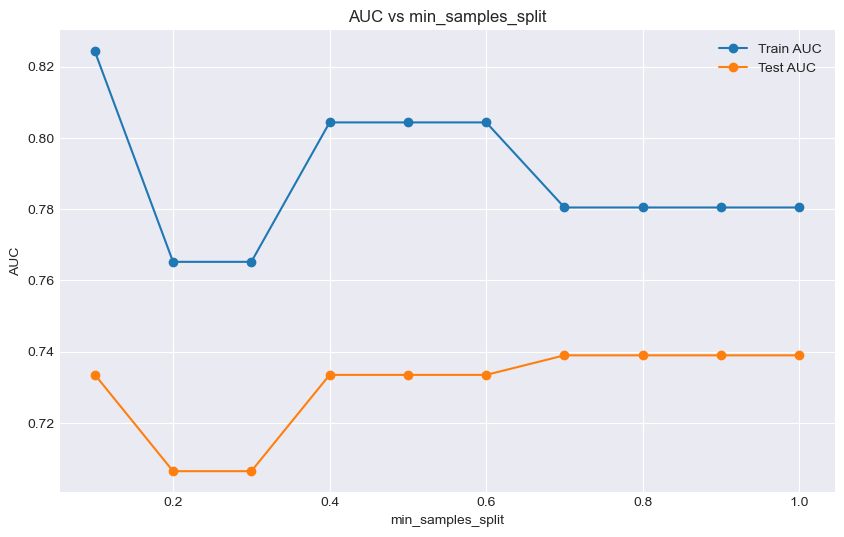

In [6]:
# Create an array for min_sample_splits values
min_samples_splits = np.arange(0.1, 1.1, 0.1)

# Initialize lists to store AUC values
train_auc = []
test_auc = []

# Train the classifier for each min_samples_splits value
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    
    # Calculate AUC for training set
    train_pred = dt.predict(X_train)
    fpr_train, tpr_train, _ = roc_curve(y_train, train_pred)
    train_auc.append(auc(fpr_train, tpr_train))
    
    # Calculate AUC for test set
    test_pred = dt.predict(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_pred)
    test_auc.append(auc(fpr_test, tpr_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_auc, marker='o', label='Train AUC')
plt.plot(min_samples_splits, test_auc, marker='o', label='Test AUC')
plt.xlabel('min_samples_split')
plt.ylabel('AUC')
plt.title('AUC vs min_samples_split')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Your observations here 

## Minimum Sample Split

Now check for the best `min_samples_splits` parameter for our decision tree 

- Create an array for `min_sample_splits` values ranging from 0.1 - 1 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_splits` value (10 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

In [7]:
min_samples_splits = np.arange(0.1, 1.1, 0.1)


In [8]:
# Identify the optimal min-samples-split for given data
train_auc = []
test_auc = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, min_samples_split=min_samples_split)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    fpr_train, tpr_train, _ = roc_curve(y_train, train_pred)
    train_auc.append(auc(fpr_train, tpr_train))
    
    test_pred = dt.predict(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_pred)
    test_auc.append(auc(fpr_test, tpr_test))


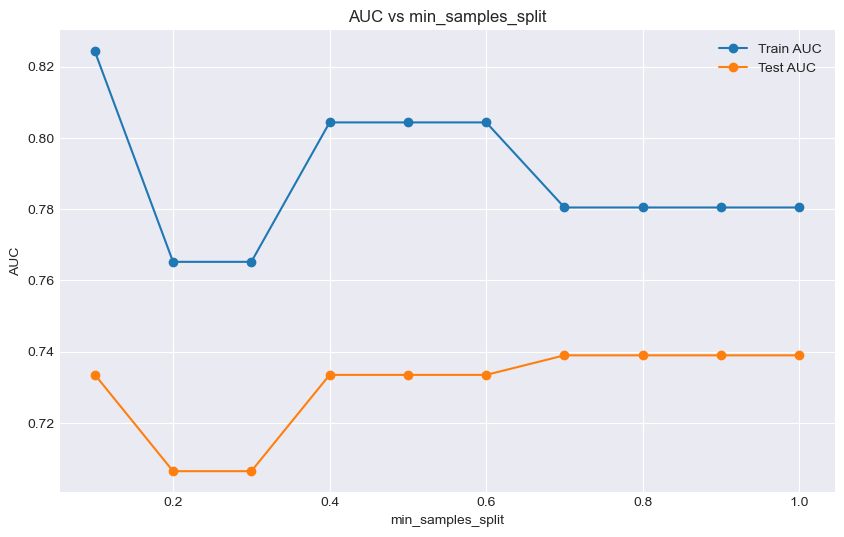

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_auc, marker='o', label='Train AUC')
plt.plot(min_samples_splits, test_auc, marker='o', label='Test AUC')
plt.xlabel('min_samples_split')
plt.ylabel('AUC')
plt.title('AUC vs min_samples_split')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Your observations here

## Minimum Sample Leafs

Now check for the best `min_samples_leafs` parameter value for our decision tree 

- Create an array for `min_samples_leafs` values ranging from 0.1 - 0.5 with an increment of 0.1 
- In a loop, train the classifier for each `min_samples_leafs` value (5 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

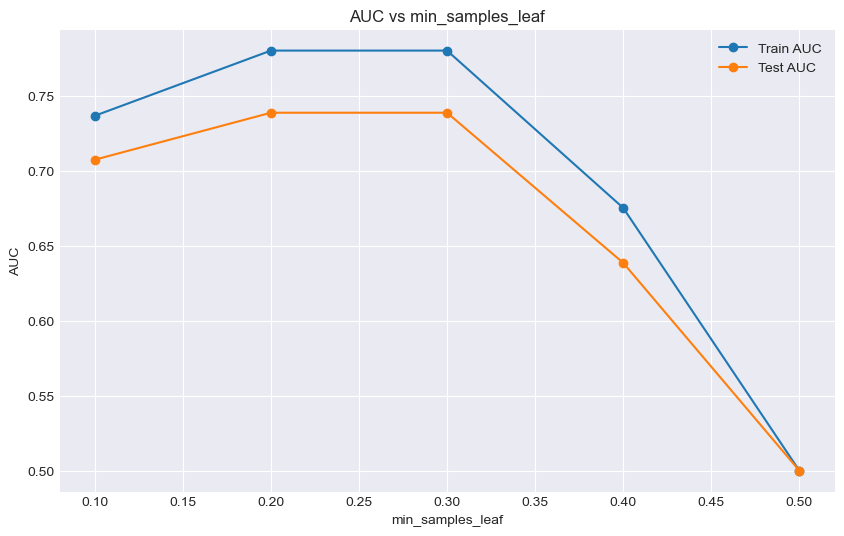

In [10]:
# Create an array for min_samples_leaf values
min_samples_leafs = np.arange(0.1, 0.6, 0.1)

# Initialize lists to store AUC values
train_auc = []
test_auc = []

# Train the classifier for each min_samples_leaf value
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    
    # Calculate AUC for training set
    train_pred = dt.predict(X_train)
    fpr_train, tpr_train, _ = roc_curve(y_train, train_pred)
    train_auc.append(auc(fpr_train, tpr_train))
    
    # Calculate AUC for test set
    test_pred = dt.predict(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_pred)
    test_auc.append(auc(fpr_test, tpr_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leafs, train_auc, marker='o', label='Train AUC')
plt.plot(min_samples_leafs, test_auc, marker='o', label='Test AUC')
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC')
plt.title('AUC vs min_samples_leaf')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Your observations here 


## Maximum Features

Now check for the best `max_features` parameter value for our decision tree 

- Create an array for `max_features` values ranging from 1 - 12 (1 feature vs all)
- In a loop, train the classifier for each `max_features` value (12 runs) 
- Calculate the training and test AUC for each run 
- Plot a graph to show under/overfitting and the optimal value 
- Interpret the results

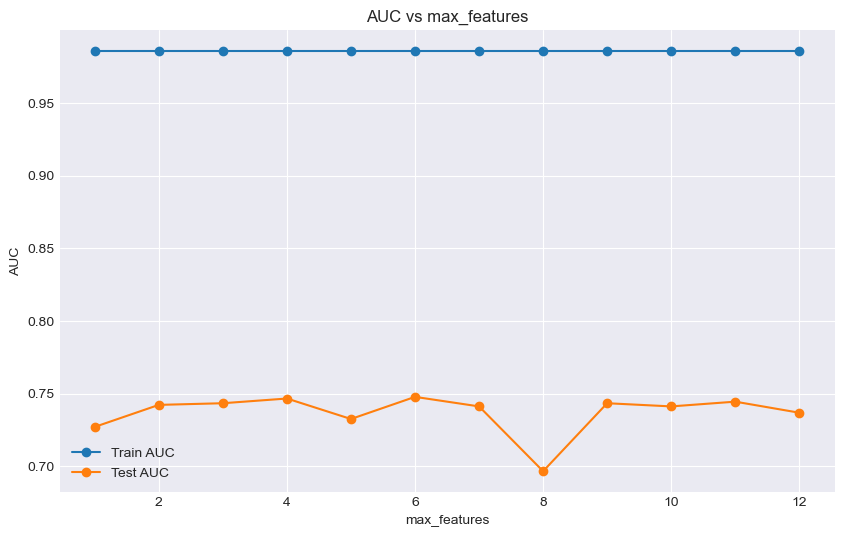

In [11]:
# Create an array for max_features values
max_features_values = np.arange(1, 13)

# Initialize lists to store AUC values
train_auc = []
test_auc = []

# Train the classifier for each max_features value
for max_features in max_features_values:
    dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED, max_features=max_features)
    dt.fit(X_train, y_train)
    
    # Calculate AUC for training set
    train_pred = dt.predict(X_train)
    fpr_train, tpr_train, _ = roc_curve(y_train, train_pred)
    train_auc.append(auc(fpr_train, tpr_train))
    
    # Calculate AUC for test set
    test_pred = dt.predict(X_test)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_pred)
    test_auc.append(auc(fpr_test, tpr_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, train_auc, marker='o', label='Train AUC')
plt.plot(max_features_values, test_auc, marker='o', label='Test AUC')
plt.xlabel('max_features')
plt.ylabel('AUC')
plt.title('AUC vs max_features')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Your observations here

## Re-train the classifier with chosen values

Now we will use the best values from each training phase above and feed it back to our classifier. Then we can see if there is any improvement in predictive performance. 

- Train the classifier with the optimal values identified 
- Compare the AUC of the new model with the earlier vanilla decision tree AUC 
- Interpret the results of the comparison

In [15]:
# Train a classifier with optimal values identified above

optimal_min_samples_split = 5
optimal_min_samples_leaf = 2
optimal_max_features = 8

dt_optimal = DecisionTreeClassifier(criterion='entropy', random_state=SEED,
                                    min_samples_split=optimal_min_samples_split,
                                    min_samples_leaf=optimal_min_samples_leaf,
                                    max_features=optimal_max_features)
dt_optimal.fit(X_train, y_train)

# Calculate AUC for the new model
false_positive_rate_optimal, true_positive_rate_optimal, thresholds_optimal = roc_curve(y_test, dt_optimal.predict(X_test))
roc_auc_optimal = auc(false_positive_rate_optimal, true_positive_rate_optimal)

# Compare AUC with the earlier vanilla decision tree AUC
print("AUC for vanilla decision tree:", roc_auc)
print("AUC for decision tree with optimal values:", roc_auc_optimal)



AUC for vanilla decision tree: 0.7367718101733446
AUC for decision tree with optimal values: 0.7150895140664961


In [ ]:
# Your observations here

In order to address the issue of a baseline classifier performing better than a tuned one like this, a more-sophisticated technique is called a "grid search" and this will be introduced in a future lesson.

## Summary 

In this lesson, we looked at tuning a decision tree classifier in order to avoid overfitting and increasing the generalization capabilities of the classifier. For the titanic dataset, we see that identifying optimal parameter values can result in some improvements towards predictions. This idea will be exploited further in upcoming lessons and labs. 